# Defining


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel,SelectKBest # RFECV,
from sklearn.metrics import r2_score, root_mean_squared_error

from sklearn import set_config
from FunctionsML import *

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
#from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.tree import plot_tree

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('Data/housing_iteration_6_regression.csv')

In [ ]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
611,612,80,RL,NaN,10395,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,233.0,TA,TA,CBlock,Gd,TA,Av,ALQ,605,Unf,0,427,1032,GasA,TA,Y,SBrkr,1032,0,0,1032,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Unf,2,564,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,500,7,2007,WD,Normal,148000
846,847,60,RL,75.0,9317,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,137.0,Gd,TA,PConc,Gd,TA,No,ALQ,513,Unf,0,227,740,GasA,Ex,Y,SBrkr,1006,769,0,1775,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1993.0,Unf,2,425,TA,TA,Y,234,72,192,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,213000
1074,1075,20,RL,74.0,8556,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1240,1240,GasA,Ex,Y,SBrkr,1240,0,0,1240,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,RFn,3,826,TA,TA,Y,140,93,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,194000
546,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,Gd,TA,No,Rec,300,Unf,0,765,1065,GasA,Ex,Y,FuseA,915,720,0,1635,0,0,1,1,3,1,TA,6,Typ,1,Gd,Detchd,1950.0,Unf,2,440,TA,TA,Y,0,38,0,144,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
117,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1125,1125,GasA,Gd,Y,SBrkr,1125,0,0,1125,0,0,1,1,2,1,TA,5,Typ,0,NaN,Attchd,2007.0,Unf,2,430,TA,TA,Y,80,64,0,0,0,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000


In [ ]:
# get rid of 10 strange entries in MSZoning
df.loc[df['MSZoning'] == 'C (all)','MSZoning'] = 'NA'

# Preprocessing

In [ ]:
# creating a dict to save scores
scores = {}

# get predictions and target features
X = df.copy() # prediction features
X = X.set_index('Id')
y = X.pop('SalePrice') # target features

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1230)

# 1) Built Preprocessor
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer()
)

In [ ]:
# Setting up ordinal encoder
set_config(transform_output='pandas')
# Ordinal features
ord_feat = ['ExterQual',
            'ExterCond',
            'MSZoning',  # keep an eye on it, because maybe its the wrong order, but this seems to be an important metric
            'LotShape',  # new
            'Utilities', # new
            'LandSlope', # new
            'BsmtQual',
            'BsmtCond',
            'BsmtExposure', # seems important
            'BsmtFinType1',
            'BsmtFinType2', # new
            'HeatingQC',
            'CentralAir', # seems important
            'KitchenQual',
            'FireplaceQu',
            #'GarageType', # new, keep an eye on it, maybe wrong order
            'GarageFinish', # new
            'GarageQual',
            'GarageCond', # new
            'PavedDrive', # new
            'PoolQC',
            'Fence']

# All orders must include the cat_imputer's fill_value so missing values can be encoded
# Repeated ordered categories
ex_to_po = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']

# Category orders for each ordinal feature
ExterQual = ex_to_po
ExterCond = ex_to_po
MSZoning = ['FV','RL','RP','RH','RM','C','A', 'I', 'NA']
LotShape = ['IR3','IR2','IR1','Reg','NA']
Utilities = ['AllPub','NoSewr','NoSeWa','ELO','NA']
LandSlope = ['Sev','Mod','Gtl','NA']
BsmtQual = ex_to_po
BsmtCond = ex_to_po
BsmtExposure = ['Gd', 'Av', 'Mn', 'No', 'NA']
BsmtFinType1 = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
BsmtFinType2 = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
HeatingQC = ex_to_po
CentralAir = ['Y','N','NA']
KitchenQual = ex_to_po
FireplaceQu = ex_to_po
#GarageType = ['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd','NA']
GarageFinish =['Fin','RFn','Unf','NA']
GarageQual = ex_to_po
GarageCond = ex_to_po
PavedDrive =['Y', 'P', 'N', 'NA']
PoolQC = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
Fence = ['GdPrv','MnPrv','GdWo','MnWw','NA']

category_orders = [ExterQual,
                   ExterCond,
                   MSZoning,  # keep an eye on
                   LotShape, # new
                   Utilities, # new
                   LandSlope, #new
                   BsmtQual,
                   BsmtCond,
                   BsmtExposure,
                   BsmtFinType1,
                   BsmtFinType2, # new
                   HeatingQC,
                   CentralAir,
                   KitchenQual,
                   FireplaceQu,
                   #GarageType, # new keep an eye on
                   GarageFinish,
                   GarageQual,
                   GarageCond, # new
                   PavedDrive, # new
                   PoolQC,
                   Fence]

# Initializing ordinal encoder
ord_encoder = OrdinalEncoder(categories=category_orders)


# setting up the one hot encoder
# One hot features (remaining categorical features)
oh_feat = list(set(X_cat)-set(ord_feat))

# Initializing one hot encoder
oh_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', #min_frequency determined in grid
                           sparse_output=False) #must be false now that we've set_config to pandas

# full categorical encoder
cat_encoder = ColumnTransformer(
    transformers=[
    ('oh_encoder', oh_encoder, oh_feat),
    ('ord_encoder', ord_encoder, ord_feat)
    ], verbose_feature_names_out=False) #this is just for plotting the tree
cat_encoder

ColumnTransformer(transformers=[('oh_encoder',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               sparse_output=False),
                                 ['Electrical', 'RoofMatl', 'MasVnrType',
                                  'HouseStyle', 'GarageType', 'RoofStyle',
                                  'Condition2', 'MiscFeature', 'Exterior1st',
                                  'Alley', 'Heating', 'Functional', 'SaleType',
                                  'LandContour', 'Foundation', 'Street',
                                  'Condition1', 'Exterior2nd', 'Neighborh...
                                                            ['Ex', 'Gd', 'TA',
                                                             'Fa', 'NA'],
                                                            ['GdPrv', 'MnPrv',
                                                             'GdWo', 'MnWw',
                                                             'NA']]),
                                 ['ExterQual', 'ExterCond', 'MSZoning',
                                  'LotShape', 'Utilities', 'LandSlope',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                                  'CentralAir', 'KitchenQual', 'FireplaceQu',
                                  'GarageFinish', 'GarageQual', 'GarageCond',
                                  'PavedDrive', 'PoolQC', 'Fence'])],
                  verbose_feature_names_out=False)

In [ ]:
# create categorical pipeline, with the SimpleImputer(fill_value="N_A")
# and the OneHotEncoder

categoric_pipe = make_pipeline(
                SimpleImputer(fill_value="NA"),  # strategy determined in grid, OR put strategy="constant",
                cat_encoder#,
                # sparse_output = False    # without this I get strange errors, definitely should set this to false if set_config(transform_output='pandas')
                # optional: min_frequency = 0.01
)

# initialize the make_column_transformer to split into branches
preprocessor = ColumnTransformer(
    transformers=[
    ('num_pipe', numeric_pipe, X_num.columns),
    ('cat_pipe', categoric_pipe, X_cat.columns),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [ ]:
# # make a report
# from ydata_profiling import ProfileReport
# report = ProfileReport(pd.concat([X_train,y_train],axis=1))
# report.to_file('report_regression.html')

# Different Algorithms


In [ ]:
## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from numpy import arange #this allows you to make ranges with floats

# create full pipeline
dt_pipe = make_pipeline(preprocessor,
                              DecisionTreeRegressor(random_state=123))

dt_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=123))])

In [ ]:
# Defining the cross validation

# good start:
# dt_param_grid = {
#     'columntransformer__num_pipe__simpleimputer__strategy':['mean','median'],
#     'decisiontreeregressor__max_depth': range(2, 15, 2),
#     'decisiontreeregressor__min_samples_leaf': range(5,30,3),
#     'decisiontreeregressor__min_impurity_decrease':arange(0.1, 0.5, 0.2),
#     'decisiontreeregressor__ccp_alpha':[10**e for e in range(-4, 0)] + [0]
# }

dt_param_grid = {
    'columntransformer__cat_pipe__simpleimputer__strategy':['constant','most_frequent'],
    'columntransformer__num_pipe__simpleimputer__strategy':['mean','median'],
    'decisiontreeregressor__max_depth': range(13, 16, 1),     # bisher 10
    'decisiontreeregressor__min_samples_leaf': range(13,16,1), # bisher 17
    'decisiontreeregressor__min_impurity_decrease':arange(0.1, 0.5, 0.1),  # bisher 0.1
    'decisiontreeregressor__ccp_alpha': [0] + [10**e for e in range(-7, -4)]
}

# Initalize the GridSearch
dt_search = GridSearchCV(dt_pipe, # you have defined this beforehand
                      dt_param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='neg_root_mean_squared_log_error', # the performance metric to use,
                      n_jobs=-1, # uses all CPU cores, slows down other applications
                      verbose=1) # we want informative outputs during the training process, try changing it to 2 and see what happens

# Fit your 'search' to the training data
%time dt_search.fit(X_train, y_train)

# Use model to predict training data
dt_r2 = r2_score(y_train, dt_search.predict(X_train))
print('The r2_score for the training data is: ', round(dt_r2,2))
dt_rmse = root_mean_squared_error(y_train, dt_search.predict(X_train))
print('The rmse for the training data is: ', round(dt_rmse,2))
# best parameters
print('The best parameters are: ')
dt_search.best_params_

Fitting 5 folds for each of 4480 candidates, totalling 22400 fits
CPU times: total: 3min 39s
Wall time: 6min 51s
The r2_score for the training data is:  0.86
The rmse for the training data is:  29710.6
The best parameters are: 


{'columntransformer__cat_pipe__simpleimputer__strategy': 'most_frequent',
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeregressor__ccp_alpha': 0,
 'decisiontreeregressor__max_depth': 12,
 'decisiontreeregressor__min_impurity_decrease': 0.1,
 'decisiontreeregressor__min_samples_leaf': 14}

In [ ]:
# Use model to predict testing data
dt_score = root_mean_squared_error(y_test, dt_search.predict(X_test))
print('The rsme for the testing data is: ', round(dt_score,2))

# save score to dictionary
scores['DecisionTree'] = dt_score

The rsme for the testing data is:  36537.86


In [1]:
#show_best(dt_search,25).sort_values('param_decisiontreeregressor max_depth')

# K nearest neighbours
* requires scaling
* highly sensitve to feature selection -> Feature selection
* slow prediction, fast fitting
* Principal component analysis can be implemented into the pipeline

 ⚙ **Major Hyperparameters**
-  `n_neighbors`: Number of nearest neighbors that get to vote. **Smaller values detect more fine-grained patterns but increase overfitting**. A reasonable range **depends heavily on the size of the dataset** and the complexity of the problem. **Start small with a range from 3-10 for smaller datasets**. A range up to 50 or even higher can be reasonable for larger datasets.
- `weights`: Determines whether to weight the votes of neighbors based on how close they are. Try both.
  - `'uniform'`: gives each neighbor equal say in the prediction.
  - `'distance'`: gives nearer neighbors more say in the prediction.
- `p`: Determines how distance is measured when votes are weighted.
  - `1`: Measures with manhattan distance, summing the differences in each feature.
  - `2`: Measures with Euclidean distance, cutting through the feature space with a straight line.
  - Other values result in more complex measures of distance and a **range from 1 to 5 may be worth testing**.<br><br>

- Decision trees **have feature importances** allowing them to be used with `RFECV` and `SelectFromModel`.
- The attribute `model.feature_importances_` will display the relative feature importances (the model's evaluation of the helpfulness of each feature) if you wish to do custom feature selection.
  - To access a model inside a pipeline, you can use the `.named_steps` attribute. For instance, `dt_search.best_estimator_.named_steps['decisiontreeclassifier'].feature_importances_`. If you use `Pipeline`, you name the steps yourself.`make_pipeline` names them automatically, generally in lowercase with no underscores or spaces. You can also use an index and grab the last step in the pipeline as it is generally your model: `dt_search.best_estimator_[-1].feature_importances_`.<br><br>


In [ ]:
# # Check how many features there are after preprocessing and feature selection
# # Make sure you don't have more principle components than this number of features
# from sklearn.feature_selection import SelectFromModel
# from sklearn.tree import DecisionTreeRegressor

# encoded = preprocessor.fit_transform(X_train)
# selected = SelectFromModel(DecisionTreeRegressor(random_state=42)).fit_transform(encoded, y_train)
# num_features = selected.shape[1] #should keep n_components less than this number
# num_features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

knn_pipe= Pipeline([('preprocessor',preprocessor),
                    ('standardscaler',StandardScaler()),
                    ('feature', 'passthrough'),#
                    ('pca','passthrough'), #PCA(), #PCA should be done after scaling
                    ('knn',KNeighborsRegressor()),
])

knn_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFull...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('feature', 'passthrough'), ('pca', 'passthrough'),
                ('knn', KNeighborsRegressor())])

In [ ]:
# good starting values
# knn_param_grid = {
#     'columntransformer__cat_pipe__simpleimputer__strategy':['constant'], # 'constant','most_frequent'
#     'columntransformer__num_pipe__simpleimputer__strategy':['mean'],
#     'standardscaler': [StandardScaler()],                                # OPTION 'passthrough' for using no scaler, StandardScaler(), RobustScaler(), MinMaxScaler()
#     'pca__n_components': range(3, 10),
#     'kneighborsregressor__n_neighbors': range(3, 10),                    #  up to 50 for large datasets
#     'kneighborsregressor__weights': ['uniform','distance'],              #2 options,
#     'kneighborsregressor__p':range(1,5,1)                                # range from 1 to 5 may be worth testing
# }
# param grid select from model
knn_param_grid = {
    'preprocessor__cat_pipe__simpleimputer__strategy':['constant','most_frequent'], # ']constant',
    'preprocessor__num_pipe__simpleimputer__strategy':['mean','median'], #
    'standardscaler': [StandardScaler(), RobustScaler()],  #      , MinMaxScaler()                        # OPTION 'passthrough' for using no scaler, StandardScaler(), RobustScaler(), MinMaxScaler()
   # 'pca':[PCA(),'passthrough'],
    #'pca__n_components': range(5, 10, 2),   # ERROR'str' object has no attribute 'set_params'
    'feature':[SelectFromModel(DecisionTreeRegressor(random_state=123))], #SelectKBest(score_func=f_regression)
    'knn__n_neighbors': range(8,12,1),                    #  up to 50 for large datasets
    'knn__weights': ['distance','uniform'],              #
    'knn__p': arange(1,2,0.5)                                # range from 1 to 5 may be worth testing
}
# param grid for kbest f regression
knn_param_grid = {
    'preprocessor__cat_pipe__simpleimputer__strategy':['constant'], # ']constant',,'most_frequent'
    'preprocessor__num_pipe__simpleimputer__strategy':['mean','median'], #
    'standardscaler': [StandardScaler(), RobustScaler()],  #                            # MinMaxScaler() OPTION 'passthrough' for using no scaler, StandardScaler(), RobustScaler(), MinMaxScaler()
   # 'pca':[PCA(),'passthrough'],
    #'pca__n_components': range(5, 10, 2),   # ERROR'str' object has no attribute 'set_params'
    'feature':[SelectKBest()], #SelectFromModel(DecisionTreeRegressor(random_state=123))
    'feature__score_func': [f_regression,mutual_info_regression], # , ()
    'feature__k':range(15,17,1),
    # SelectKBest(score_func=f_regression, k=10)  # or mutual_info_regression
    'knn__n_neighbors': range(12,15,1),                    #  up to 50 for large datasets
    'knn__weights': ['distance'],              #,'uniform'
    'knn__p': arange(1.3,1.9,0.2)                                 # range from 1 to 5 may be worth testing
}
# param grid for kbest
knn_param_grid = {
    'preprocessor__cat_pipe__simpleimputer__strategy':['constant'], # ']constant',,'most_frequent'
    'preprocessor__num_pipe__simpleimputer__strategy':['mean','median'], #
    'standardscaler': [StandardScaler(), RobustScaler()],  #                            # MinMaxScaler() OPTION 'passthrough' for using no scaler, StandardScaler(), RobustScaler(), MinMaxScaler()
   # 'pca':[PCA(),'passthrough'],
    #'pca__n_components': range(5, 10, 2),   # ERROR'str' object has no attribute 'set_params'
    'feature':[SelectKBest()], #SelectFromModel(DecisionTreeRegressor(random_state=123))
    'feature__score_func': [mutual_info_regression], # , ()
    'feature__k':range(16,22,1),
    # SelectKBest(score_func=f_regression, k=10)  # or mutual_info_regression
    'knn__n_neighbors': range(12,15,1),                    #  up to 50 for large datasets
    'knn__weights': ['distance'],              #,'uniform'
    'knn__p': arange(1.2,1.6,0.1)                                 # range from 1 to 5 may be worth testing
}                                                                       #108 fits per fold

knn_search = GridSearchCV(knn_pipe,
                          knn_param_grid,
                          cv=5,
                          scoring='neg_root_mean_squared_log_error',
                          verbose=1,
                          n_jobs=-1)

%time knn_search.fit(X_train, y_train)

# Use model to predict training data (here I get overfits by the training data)
# knn_r2 = r2_score(y_train, knn_search.predict(X_train))
# print('The r2_score for the training data is: ', round(knn_r2,2))
# knn_rmse = root_mean_squared_error(y_train, knn_search.predict(X_train))
# print('The rmse for the training data is: ', round(knn_rmse,2))

# best parameters
print('The best score is: ', round(knn_search.best_score_,3))
# best parameters
print('The best parameters are: ')
knn_search.best_params_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
CPU times: total: 16.2 s
Wall time: 5min 38s
The best score is:  -0.163
The best parameters are: 


{'feature': SelectKBest(),
 'feature__k': 17,
 'feature__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_regression(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'knn__n_neighbors': 12,
 'knn__p': 1.2,
 'knn__weights': 'distance',
 'preprocessor__cat_pipe__simpleimputer__strategy': 'constant',
 'preprocessor__num_pipe__simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [ ]:
test = show_best(knn_search,25)
print('the result is:', test['mean_test_score'].mean(), '+-' , test['mean_test_score'].std())

the result is: -0.1643257956727635 +- 0.000383481090820969


In [2]:
# show results of best 15 folds
# show_best(knn_search,25)#.sort_values('param_knn n_neighbors')#.sort_values('param_feature k')#

In [ ]:
# Use model to predict testing data
knn_score = root_mean_squared_error(y_test, knn_search.predict(X_test))
print('The rsme for the testing data is: ', round(knn_score,2))
knn_score = r2_score(y_test, knn_search.predict(X_test))
print('The r2 for the testing data is: ', round(knn_score,2))
# save score to dictionary
scores['Knn'] = knn_score

The rsme for the testing data is:  31685.85
The r2 for the testing data is:  0.85


In [ ]:
knn_search.best_estimator_.named_steps['knn'].feature_names_in_

array(['num_pipe__OverallQual', 'num_pipe__YearBuilt',
       'num_pipe__YearRemodAdd', 'num_pipe__TotalBsmtSF',
       'num_pipe__1stFlrSF', 'num_pipe__GrLivArea', 'num_pipe__FullBath',
       'num_pipe__TotRmsAbvGrd', 'num_pipe__GarageCars',
       'num_pipe__GarageArea', 'cat_pipe__ExterQual',
       'cat_pipe__BsmtQual', 'cat_pipe__KitchenQual',
       'cat_pipe__FireplaceQu', 'cat_pipe__GarageFinish'], dtype=object)

# Support Vector Machines

 📑 **Implementation Notes**
- Support vector machines **require scaling**.
- Like with Logistic Regression, **the hyperparameter `C` must be capitalized, even in the parameter grid**.
- Like logistic regression, the model is designed for binary classification but can be extended to multiclass problems with clever tricks that sklean has built-in.
- Several "dependent hyperparameters" like `degree` only apply to certain `kernel` types. Unlike with logistic regression, sklean will handle this cleverly behind the scenes during cross-validation and will not test dependent hyperparameters when their dependencies have not been met (for instance, it will not try out different values for `degree` when the `kernel` is not set to `'poly'`).
- Support vector machines are **compatible with feature selection methods like `RFECV` and `SelectFromModel`when `kernel = 'linear'`**.
- When `kernel = 'linear'` and the data has been scaled prior to training, the attribute `model.coef_` will display the relative feature importances (the model's evaluation of the helpfulness of each feature) if you wish to do custom feature selection. Make sure to **look at the absolute value of these coefficients** as large negative values represent very important features that are simply inversely correlated with the target feature.
  - To access a model inside a pipeline, you can use the `.named_steps` attribute. For instance, `svc_search.best_estimator_.named_steps['svc'].coef_`. If you use `Pipeline`, you name the steps yourself.`make_pipeline` names them automatically, generally in lowercase with no underscores or spaces. You can also use an index and grab the last step in the pipeline as it is generally your model: `svc_search.best_estimator_[-1].coef_`.
- **Support vector machines require tuning**, identifying the proper `kernel` and `C` settings are essential to good performance.
- Unlike other models, there is a hyperparameter, `probability`, that must be set to `True` when training the model in order to make subsequent probabilistic predictions with `model.predict_proba`.
- Sklearn's `SVR` struggles to handle datasets with >10,000 observations. Consult the documentation for suggested alternatives.<br><br>

 ⚙ **Major Hyperparameters**
-  `C`: Determines the strength of the regularization. **Higher values reduce regularization and increase overfitting**. Start with a wide range and then drill in with finer-grain optimization once you have a sense of where to check for the optimal value. **Reasonable ranges go from 0.001 to 1000**.
- `kernel`: Determines the types of deformations of feature space that the algorithm can perform. It is best to try all of these during tuning to find which one appropriately fits the problem.
  - `'linear'`: No deformation of space, **useful for simple problems but unable to deal with more complex patterns**.
  - `'rbf'`: **Highly flexible but computationally expensive**. It is the default option due to its success in a wide variety of problems.
  -`'poly'`: Has an amount of flexibility somewhere between `'linear'` and `'rbf'`. Should be tuned along with its "dependent hyperparameter" `degree` which only has an effect when using a polynomial kernel.
- `degree`: Only affects `'poly'` kernel. **A range from 2-4 is reasonable**. **Higher values are more likely to overfit**.
- `gamma`: Determines how significantly the algorithm can curve space to fit individual training data. Only affects `'rbf'` and `'poly'` kernel types. **Higher values overfit**. **A reasonable range to test can go from 0.0001 to 10000** but **larger values for gamma can result in very long training times**. **Try small values (less than 1) first** and only increase to 1 and higher if the best identified is the highest in the attempted range.<br>

**Classification Specific Hyperparameters**
- `class_weight`: Prioritizes the accurate classification of classes differently. Can be **helpful in cases where the severity of the consequences of misclassification for different classes are different**; for instance, we may want to weigh the accurate classification of poisonous mushrooms more heavily than the accurate classification of different edible mushrooms. It is also **helpful when the proportions of target classes in the training data are significantly different**, for instance, if only 10% of the training data is of one class and the other 90% is of another. In these cases the models may predict the majority class even without evidence as it is still likely right. We can prevent algorithms from getting lazy and force them to learn meaningful patterns by increasing the weight of the minority class.
  - `None`: The default. Treats all classes equally.
  - `'balanced'`: Designed to **correct for majority bias in cases of class imbalance**.
  - `{}`: For custom weighting that prioritizes the accurate classification of certain classes over others, a dictionary can be provided. For instance, `class_weight = {0:1, 1:2}` will make the proper classification of the positive class (`1`) twice as important to the algorithm relative to the negative class (`0`) resulting in higher recall.<br>

**Regression Specific Hyperparameters**
- `epsilon`: Defines the width of the "tolerance tube", an area around the "trendline" that does not contribute to error calculations during the fitting process. Epsilon is one of the ways even linear support vector regression differs from linear regression, and makes it less prone to overfitting than the latter. **Smaller values tend to overfit**. **A reasonable range for epsilon is from 0.01 to 1 although values closer to 0.1 are more typical**.<br><br>

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

svm_pipe = make_pipeline(preprocessor,
                                  StandardScaler(),
                                  PCA(n_components=5), #PCA should be done after scaling
                                  SVR(random_state=42))

svm_param_grid = {
    'svr__C': [10**e for e in range(-2,2)],                          #4 options
    'svr__kernel': ['linear', 'poly', 'rbf'],                        #3 options
    'svr__degree': range(2, 5),                                      #3 options
    'svr__gamma': ['scale', 'auto'] + [10**e for e in range(-3, -1)] #4 options
}                                                                    #144 fits per fold

svm_search = GridSearchCV(svm_pipe,
                          svm_param_grid,
                          cv=5,
                          scoring='neg_root_mean_squared_log_error',
                          verbose=2,
                          n_jobs=-1)

svm_search.fit(X_train, y_train)

# cross validation average accuracy
print('The best scores for the training data is: ', svm_search.best_score_)
# best parameters
print('The best parameters are: ')
svm_search.best_params_

In [ ]:
# Use model to predict training data
svm_score = r2_score(y_train, svm_search.predict(X_train))
print('The r2_score for the training data is: ', round(svm_score,2))

# Use model to predict testing data
svm_score = r2_score(y_test, svm_search.predict(X_test))
print('The r2_score for the testing data is: ', round(svm_score,2))

# save score to dictionary
scores['Svm'] = svm_score

# Random Forest
* tradeoff between performance vs training time (start with few fits)
* robust to overfitting
* no scaling
* Random forests benefit from feature selection but can still tolerate high numbers of features.
  Unlike KNN, features that only have a little information can still be utilized by random forests.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipe = make_pipeline(preprocessor,
                                 StandardScaler(),
                                 SelectKBest(score_func=mutual_info_regression,k=17), #SelectFromModel(DecisionTreeRegressor(random_state=123))
                                 RandomForestRegressor())
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsm...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

knn_pipe= Pipeline([('preprocessor',preprocessor),
                    ('standardscaler',StandardScaler()),
                    ('feature', 'passthrough'),#
                    ('pca','passthrough'), #PCA(), #PCA should be done after scaling
                    ('knn',KNeighborsRegressor()),
])

knn_pipe

In [ ]:
# rf_param_grid = {
    # 'columntransformer__cat_pipe__simpleimputer__strategy':['constant'], # 'constant','most_frequent'
    # 'columntransformer__num_pipe__simpleimputer__strategy':['mean'],
#     'randomforestregressor__max_depth': range(3,15,3),
#     'randomforestregressor__min_samples_leaf': range(5,30,5),
#     # 'randomforestregressor__min_impurity_decrease':arange(0, 0.6, 0.1),
#     'randomforestregressor__ccp_alpha': [10**e for e in range(-3, 1)]

rf_param_grid = {
    'columntransformer__cat_pipe__simpleimputer__strategy':['constant','most_frequent'], # 'constant','most_frequent'
    'columntransformer__num_pipe__simpleimputer__strategy':['mean','median'],
    'standardscaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'randomforestregressor__n_estimators': range(50, 210, 50), #(dataset very small) #7 options
    'randomforestregressor__max_depth': [9,12,15],        #6 optionsrange(3, 7, 1)
    'randomforestregressor__min_samples_leaf': [2,5,8],  #5 optionsarange(0, 0.0011, 0.0002)
    #'randomforestregressor__ccp_alpha': arange(0., 0.01, 0.0025)#[10**e for e in range(-5, -1)]                #4 options
}


rf_search = GridSearchCV(rf_pipe,
                         rf_param_grid,
                         cv=5,
                         scoring='neg_root_mean_squared_log_error', #'neg_root_mean_squared_log_error',
                         verbose=1,
                         n_jobs=-1) #especially important for random forest

%time rf_search.fit(X_train, y_train)

# # Use model to predict training data
# rf_r2 = r2_score(y_train, rf_search.predict(X_train))
# print('The r2_score for the training data is: ', round(rf_r2,2))
# rf_rmse = root_mean_squared_error(y_train, rf_search.predict(X_train))
# print('The rmse for the training data is: ', round(rf_rmse,2))

# best parameters

In [ ]:
print('The best score is: ', round(rf_search.best_score_,3))
print('The best parameters are: ')
rf_search.best_params_

The best score is:  -0.146
The best parameters are: 


{'columntransformer__cat_pipe__simpleimputer__strategy': 'constant',
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'randomforestregressor__max_depth': 15,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 200,
 'standardscaler': MinMaxScaler()}

In [ ]:
test = show_best(knn_search,25)
print('the result is:', test['mean_test_score'].mean(), '+-' , test['mean_test_score'].std())

the result is: -0.1643257956727635 +- 0.000383481090820969


<Axes: >

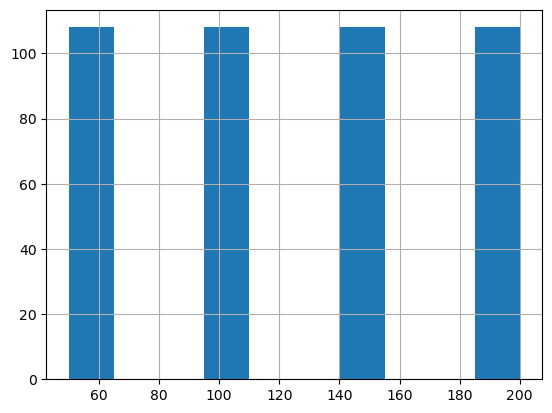

In [ ]:
test['param_randomforestregressor n_estimators'].hist()

In [ ]:
# Use model to predict testing data
rf_score = r2_score(y_test, rf_search.predict(X_test))
print('The r2 for the testing data is: ', round(rf_score,2))
rf_score = root_mean_squared_error(y_test, rf_search.predict(X_test))
print('The rsme for the testing data is: ', round(rf_score,2))

# save score to dictionary
scores['Rf'] = rf_score

The r2 for the testing data is:  0.98
The rsme for the testing data is:  12148.18


In [ ]:
save = rf_search.best_params_

# SGD Regressor

In [ ]:
sgd_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

# Submission

In [ ]:
X_competition = pd.read_csv('Data/test.csv')
X_competition.loc[X_competition['MSZoning'] == 'C (all)','MSZoning'] = 'NA'
X_competition.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Submission Logistic Regression
knn_search.best_estimator_.fit(X,y)
preds = knn_search.predict(X_competition)
preds

array([119068.93983378, 135162.47560082, 179337.22165427, ...,
       149424.70711821, 112832.37523154, 188778.94445598])

In [ ]:
submission = pd.DataFrame({'Id':X_competition['Id'],
                          'SalePrice':preds}).set_index('Id')
submission.to_csv('Submissions/knn_submission1.csv')

In [ ]:
# Submission rf
rf_search.best_estimator_.fit(X,y)
preds = rf_search.predict(X_competition)


In [ ]:
submission = pd.DataFrame({'Id':X_competition['Id'],
                          'SalePrice':preds}).set_index('Id')
submission.to_csv('Submissions/rf_submission2.csv')